In [1]:
import pandas as pd
import os
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
folder_path = 'data'

In [4]:
accelerometer1 = pd.read_csv(os.path.join(folder_path, 'nick1', 'ACG.csv'),sep=';')
gyroscope1 = pd.read_csv(os.path.join(folder_path, 'nick1','GYRO.csv'),sep=';')
accelerometer1.rename(columns={'x':'accelerometer_x','y':'accelerometer_y','z':'accelerometer_z'}, inplace=True)
gyroscope1.rename(columns={'x':'gyroscope_x','y':'gyroscope_y','z':'gyroscope_z'}, inplace=True)

In [5]:
accelerometer2 = pd.read_csv(os.path.join(folder_path, 'nick2', 'ACG.csv'),sep=';')
gyroscope2 = pd.read_csv(os.path.join(folder_path, 'nick2','GYRO.csv'),sep=';')
accelerometer2.rename(columns={'x':'accelerometer_x','y':'accelerometer_y','z':'accelerometer_z'}, inplace=True)
gyroscope2.rename(columns={'x':'gyroscope_x','y':'gyroscope_y','z':'gyroscope_z'}, inplace=True)

In [6]:
accelerometer3 = pd.read_csv(os.path.join(folder_path, 'till1', 'ACG.csv'),sep=';')
gyroscope3 = pd.read_csv(os.path.join(folder_path, 'till1','GYRO.csv'),sep=';')
#accelerometer3.rename(columns={'x':'accelerometer_x','y':'accelerometer_y','z':'accelerometer_z'}, inplace=True)
gyroscope3.rename(columns={'x':'gyroscope_x','y':'gyroscope_y','z':'gyroscope_z'}, inplace=True)

In [7]:
accelerometer4 = pd.read_csv(os.path.join(folder_path, 'lucas2', 'ACG.csv'),sep=';')
gyroscope4 = pd.read_csv(os.path.join(folder_path, 'lucas2','GYRO.csv'),sep=';')
accelerometer4.rename(columns={'x':'accelerometer_x','y':'accelerometer_y','z':'accelerometer_z'}, inplace=True)
gyroscope4.rename(columns={'x':'gyroscope_x','y':'gyroscope_y','z':'gyroscope_z'}, inplace=True)

In [8]:
len(accelerometer1), len(gyroscope1), len(accelerometer2), len(gyroscope2) , len(accelerometer3), len(gyroscope3)

(243238, 243235, 231522, 231517, 227509, 227507)

In [9]:
first_distribution = pd.merge(accelerometer1, gyroscope1, how='inner',on='t_Android')
second_distribution = pd.merge(accelerometer3, gyroscope3, how='inner',on='t_Android')

In [10]:
results_acc_first = []
results_gyro1 = []
results_acc_second = []
results_gyro2 = []
for i in range(len(first_distribution)%1000):
    if (i+1)*1000 < len(first_distribution):
        mean_accelerometer1 = accelerometer1['accelerometer_y'].iloc[i*1000:(i+1)*1000].mean()
        mean_gyroscope1 = gyroscope1['gyroscope_x'].iloc[i*1000:(i+1)*1000].mean()
        results_acc_first.append(mean_accelerometer1)
        results_gyro1.append(mean_gyroscope1)


for i in range(len(second_distribution)%1000):
    if (i+1)*1000 < len(second_distribution):
        mean_accelerometer2 = second_distribution['y'].iloc[i*1000:(i+1)*1000].mean()
        mean_gyroscope2 = second_distribution['gyroscope_x'].iloc[i*1000:(i+1)*1000].mean()
        results_acc_second.append(mean_accelerometer2)
        results_gyro2.append(mean_gyroscope2)

In [11]:
t_stat, p_val = stats.ttest_ind(results_acc_first,results_acc_second)
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_val}')

T-statistic: 41.08842645826269
P-value: 4.750912964419465e-156


In [12]:
stat, p = stats.levene(results_acc_first,results_acc_second)

In [13]:
print(f'Statistic: {stat}')
print(f'p-value: {p}')

Statistic: 15.731065199134285
p-value: 8.465857806221275e-05


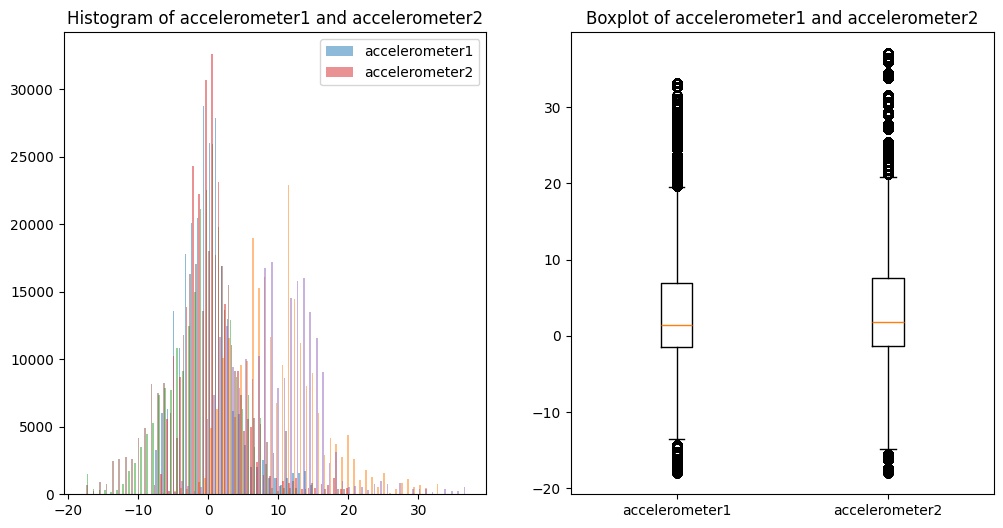

In [14]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(accelerometer1[['accelerometer_x', 'accelerometer_y', 'accelerometer_z']], bins=60, alpha=0.5, label='accelerometer1')
plt.hist(accelerometer2[['accelerometer_x', 'accelerometer_y', 'accelerometer_z']], bins=60, alpha=0.5, label='accelerometer2')
plt.legend(loc='upper right')
plt.title('Histogram of accelerometer1 and accelerometer2')

plt.subplot(1, 2, 2)
plt.boxplot([accelerometer1[['accelerometer_x', 'accelerometer_y', 'accelerometer_z']].values.flatten(), accelerometer2[['accelerometer_x', 'accelerometer_y', 'accelerometer_z']].values.flatten()], labels=['accelerometer1', 'accelerometer2'])
plt.title('Boxplot of accelerometer1 and accelerometer2')

plt.show()

In [16]:
merge_plot = pd.concat([accelerometer1,accelerometer3])

<Axes: ylabel='Density'>

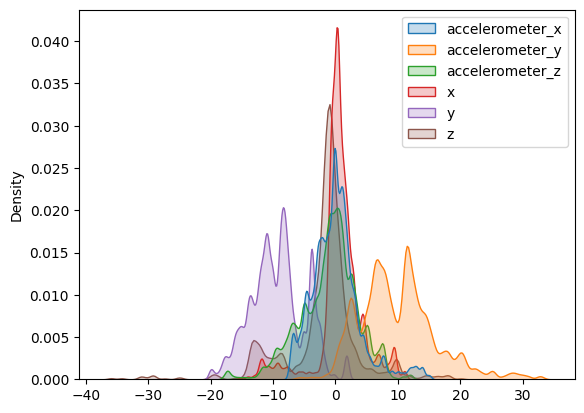

In [18]:
sns.kdeplot(merge_plot[['accelerometer_x', 'accelerometer_y', 'accelerometer_z','x','y','z']], fill=True, color='r')

In [19]:
merge_plot

,t_Android,t_unix,accelerometer_x,accelerometer_y,accelerometer_z,a,x,y,z
0,2163015197551549,1714828895796,1.28674,11.510076,-2.293521,3,NaN,NaN,NaN
1,2163015199804463,1714828895885,1.28674,11.510076,-2.293521,3,NaN,NaN,NaN
2,2163015202023823,1714828895885,1.28674,11.510076,-2.293521,3,NaN,NaN,NaN
3,2163015204239115,1714828895885,1.28674,11.510076,-2.293521,3,NaN,NaN,NaN
4,2163015206456624,1714828895885,1.28674,11.510076,-2.293521,3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
227504,1205374069466334,1714853894557,NaN,NaN,NaN,3,0.407976,1.771885,9.77468
227505,1205374071755457,1714853894557,NaN,NaN,NaN,3,0.407976,1.771885,9.77468
227506,1205374074045252,1714853894557,NaN,NaN,NaN,3,0.407976,1.771885,9.77468
227507,1205374076333094,1714853894557,NaN,NaN,NaN,3,0.407976,1.771885,9.77468
